In [50]:
import numpy as np
import matplotlib.pyplot as plt
from regions import Regions
import regions
from astropy.io import fits
from astropy.wcs import WCS
from astropy.coordinates import SkyCoord
from astropy import units as u
from spectral_cube import SpectralCube

from smart_plotters.jwst_plots import JWSTCatalog, make_cat_use, make_brick_cat
from smart_plotters.cutout_plot import get_cutout_405, get_cutout_jwst_ice, Cutout
from smart_plotters import outflow_plots as op

In [51]:
pos_c2 = SkyCoord('17:46:18.4669695284', '-28:34:47', unit=(u.hourangle, u.deg))
w = 1*u.arcmin
l = 1*u.arcmin

reg_cutout = regions.RectangleSkyRegion(center=pos_c2, width=l, height=w)
cutout_hmsfr = Cutout(pos_c2, w, l)

cutout_405 = get_cutout_405(pos_c2, w, l)

fn_b3 = '/orange/adamginsburg/ACES/mosaics/continuum/12m_continuum_commonbeam_circular_reimaged_mosaic_MUSTANGfeathered.fits'
#'/orange/adamginsburg/jwst/cloudc/alma/ACES/uid___A001_X15a0_X1a8.s10_0.Sgr_A_star_sci.v1aggregated_spw25_27_29_31_33_35.cont.I.iter1.image.tt0'
cutout_B3 = cutout_hmsfr.get_cutout(fn_b3)#, format='casa')

fn_b6 = '/orange/adamginsburg/jwst/cloudc/alma/member.uid___A001_X1590_X282a.CloudC_sci.spw29.mfs.I.manual.image.pbcor.fits'
cutout_B6 = cutout_hmsfr.get_cutout(fn_b6)

In [52]:
freq_CS, fn_CS = op.get_ACES_info('CS 2-1')

freq_CO = 230.538 * u.GHz
fn_CO = '/orange/adamginsburg/jwst/cloudc/alma/uid___A001_X1590_X282a.CloudC.spw29.merge.p.image'

In [53]:
c1_CS_outflows = op.OutflowPlot(pos_c2, l, w, restfreq=freq_CS, cube_fn=fn_CS)
c1_CO_outflows = op.OutflowPlot(pos_c2, l, w, restfreq=freq_CO, cube_fn=fn_CO)

In [54]:
cube_CS = SpectralCube.read(fn_CS).with_spectral_unit(u.km/u.s, velocity_convention='radio', rest_value=freq_CS)
subcube_CS = cube_CS.subcube_from_regions([reg_cutout], minimize=False)

ctr_v = 10*u.km/u.s
red_v = 20*u.km/u.s
blue_v = 0*u.km/u.s

mom0_red_CS = subcube_CS.spectral_slab(ctr_v, red_v).moment0()
mom0_blue_CS = subcube_CS.spectral_slab(blue_v, ctr_v).moment0()

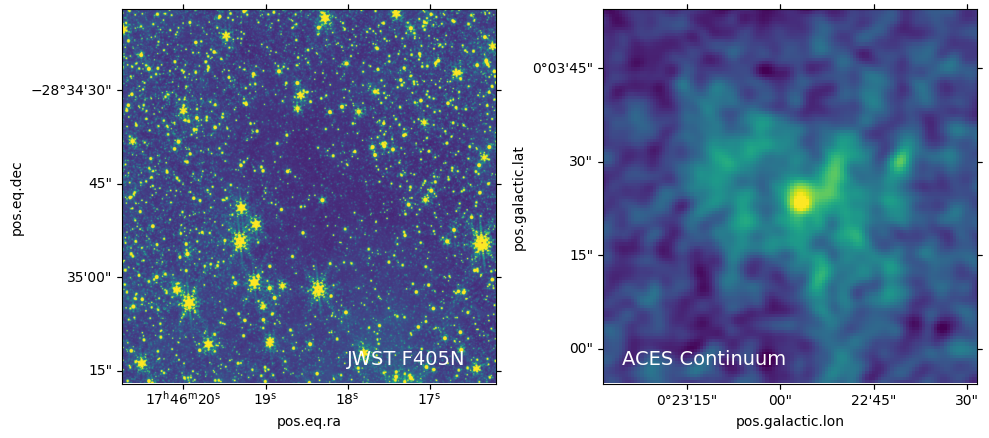

In [55]:
fig = plt.figure(figsize=(10,5))

ax1 = plt.subplot(121, projection=cutout_405.wcs)
ax1.imshow(cutout_405.data, vmin=0, vmax=50)
#ax1.contour(mom0_red_CS.data, levels=[np.nanpercentile(mom0_red_CS.data, 97)], colors='red', transform=ax1.get_transform(mom0_red_CS.wcs))
#ax1.contour(mom0_blue_CS.data, levels=[np.nanpercentile(mom0_blue_CS.data, 97)], colors='blue', transform=ax1.get_transform(mom0_blue_CS.wcs))
ax1.text(0.6, 0.05, 'JWST F405N', transform=ax1.transAxes, color='white', fontsize=14)

ax2 = plt.subplot(122, projection=cutout_B3.wcs)
ax2.imshow(cutout_B3.data, vmin=np.nanpercentile(cutout_B3.data, 0.1), vmax=np.nanpercentile(cutout_B3.data, 99.9))
#c1_CS_outflows.plot_outflows(vcen=40*u.km/u.s, vmin=30*u.km/u.s, vmax=50*u.km/u.s, ax=ax2, blue_color='blue', red_color='red', nlevels=1)
#ax2.contour(mom0_red_CS.data, levels=[np.nanpercentile(mom0_red_CS.data, 97)], colors='red', transform=ax2.get_transform(mom0_red_CS.wcs))
#ax2.contour(mom0_blue_CS.data, levels=[np.nanpercentile(mom0_blue_CS.data, 97)], colors='blue', transform=ax2.get_transform(mom0_blue_CS.wcs))
ax2.text(0.05, 0.05, 'ACES Continuum', transform=ax2.transAxes, color='white', fontsize=14)

plt.tight_layout()

In [56]:
cube_CO = SpectralCube.read(fn_CO).with_spectral_unit(u.km/u.s, velocity_convention='radio', rest_value=freq_CO)
subcube_CO = cube_CO.subcube_from_regions([reg_cutout], minimize=False)

mom0_red_CO = subcube_CO.spectral_slab(ctr_v, red_v).moment0()
mom0_blue_CO = subcube_CO.spectral_slab(blue_v, ctr_v).moment0()

/red/adamginsburg/repos/casa-formats-io/casa_formats_io/casa_dask.py:248: RuntimeWarning: divide by zero encountered in scalar remainder
  factors = [f for f in range(stacks[dim] + 1) if stacks[dim] % f == 0]
/red/adamginsburg/repos/radio-beam/radio_beam/multiple_beams.py:278: UserWarning: Do not use the average beam for convolution! Use the smallest common beam from `Beams.common_beam()`.
  warnings.warn("Do not use the average beam for convolution! Use the"
/red/adamginsburg/repos/radio-beam/radio_beam/multiple_beams.py:278: UserWarning: Do not use the average beam for convolution! Use the smallest common beam from `Beams.common_beam()`.
  warnings.warn("Do not use the average beam for convolution! Use the"


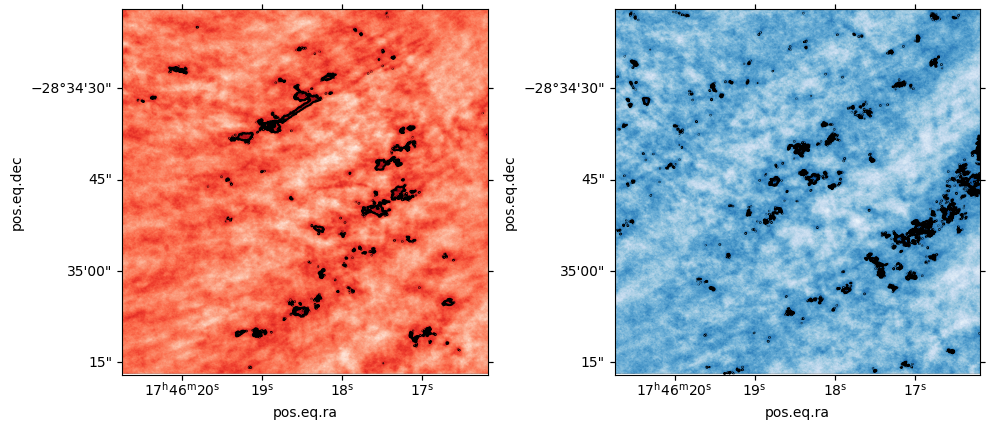

In [57]:
fig = plt.figure(figsize=(10,5))

ax1 = plt.subplot(121, projection=mom0_red_CO.wcs)
ax1.imshow(mom0_red_CO.data, origin='lower', cmap='Reds')
ax1.contour(mom0_red_CO.data, levels=[np.nanpercentile(mom0_red_CO.data, 99)], colors='k', transform=ax1.get_transform(mom0_red_CO.wcs))

ax2 = plt.subplot(122, projection=mom0_blue_CO.wcs)
ax2.imshow(mom0_blue_CO.data, origin='lower', cmap='Blues')
ax2.contour(mom0_blue_CO.data, levels=[np.nanpercentile(mom0_blue_CO.data, 99)], colors='k', transform=ax2.get_transform(mom0_blue_CO.wcs))

plt.tight_layout()

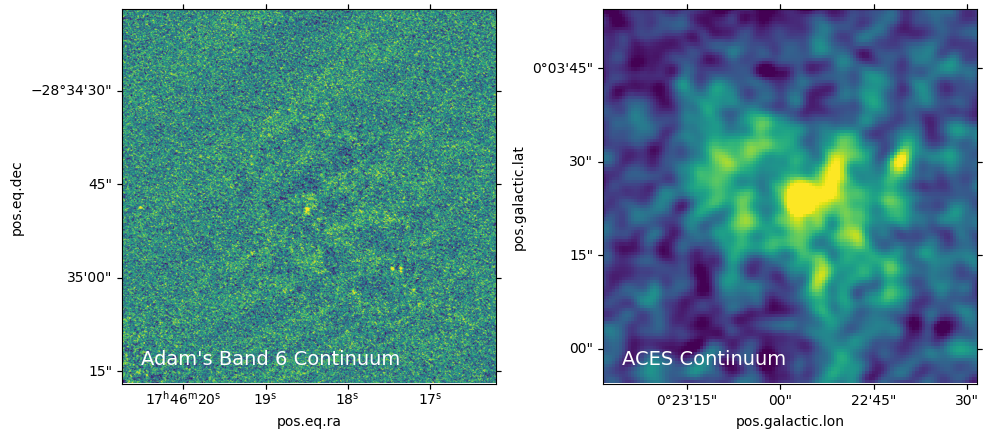

In [58]:
fig = plt.figure(figsize=(10,5))

ax1 = plt.subplot(121, projection=cutout_B6.wcs)
ax1.imshow(cutout_B6.data, vmin=np.nanpercentile(cutout_B6.data, 1), vmax=np.nanpercentile(cutout_B6.data, 99))
#c1_CO_outflows.plot_outflows(vcen=40*u.km/u.s, vmin=30*u.km/u.s, vmax=50*u.km/u.s, ax=ax, blue_color='blue', red_color='red', nlevels=1)
xlims = ax1.get_xlim()
ylims = ax1.get_ylim()
#ax1.contour(mom0_red_CO.data, levels=[np.nanpercentile(mom0_red_CO.data, 99)], colors='red', transform=ax1.get_transform(mom0_red_CO.wcs))
#ax1.contour(mom0_blue_CO.data, levels=[np.nanpercentile(mom0_blue_CO.data, 99)], colors='blue', transform=ax1.get_transform(mom0_blue_CO.wcs))
ax1.set_xlim(xlims)
ax1.set_ylim(ylims)
ax1.text(0.05, 0.05, 'Adam\'s Band 6 Continuum', transform=ax1.transAxes, color='white', fontsize=14)

ax2 = plt.subplot(122, projection=cutout_B3.wcs)
ax2.imshow(cutout_B3.data, vmin=np.nanpercentile(cutout_B3.data, 1), vmax=np.nanpercentile(cutout_B3.data, 99))
xlims = ax2.get_xlim()
ylims = ax2.get_ylim()
#ax2.contour(mom0_red_CO.data, levels=[np.nanpercentile(mom0_red_CO.data, 99)], colors='red', transform=ax2.get_transform(mom0_red_CO.wcs))
#ax2.contour(mom0_blue_CO.data, levels=[np.nanpercentile(mom0_blue_CO.data, 99)], colors='blue', transform=ax2.get_transform(mom0_blue_CO.wcs))
ax2.set_xlim(xlims)
ax2.set_ylim(ylims)
ax2.text(0.05, 0.05, 'ACES Continuum', transform=ax2.transAxes, color='white', fontsize=14)

plt.tight_layout()